<a href="https://colab.research.google.com/github/Ankit4371/Machine-Learning-Notebooks/blob/main/Flight%20Fare%20Predictor(Random%20Forest)/Flight_Fare_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Fare Predictor

Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
%matplotlib inline

In [6]:
train_data = pd.read_excel(r"Data_Train.xlsx")
test_data = pd.read_excel(r"Test_set.xlsx",sheet_name='Sheet1')

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Exploratory Data Analysis

In [9]:
dataset = [train_data,test_data]

In [10]:
for data in dataset:
  data.dropna(inplace=True)

### Numerical Features

Date of Journey

In [11]:
for data in dataset:
  data['Journey_day'] = pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day
  data['Journey_month'] = pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month
  data['Journey_year'] = pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.year
  data.drop(["Date_of_Journey"],axis =1, inplace = True)

Departure Time

In [12]:
for data in dataset:
  data['dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour
  data['dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute
  data.drop(["Dep_Time"],axis = 1, inplace = True)

Arrival Time

In [13]:
for data in dataset:
  At = pd.to_datetime(data.Arrival_Time)
  data["Arrival_hour"] = At.dt.hour
  data["Arrival_min"] = At.dt.minute
  data.drop(["Arrival_Time"],axis =1,inplace=True)


Duration

In [14]:
for data in dataset:
  duration = list(data["Duration"])

  for i in range(len(duration)):
    if len(duration[i].split()) != 2:
      if "h" in duration[i]:
        duration[i] = duration[i] + " 0m"
      else:
        duration[i] = "0h " + duration[i]
    
  duration_hours = []
  duration_mins = []
  for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
  
  data['duration_hours']=duration_hours
  data['duration_mins'] = duration_mins

  data.drop(["Duration"],axis=1,inplace=True)


### Categorical Data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


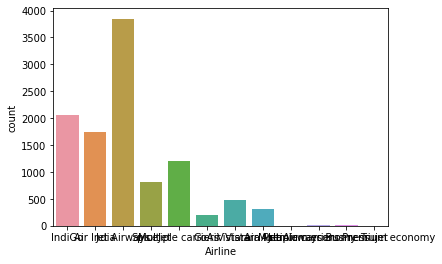

In [15]:
sns.countplot('Airline',data = train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


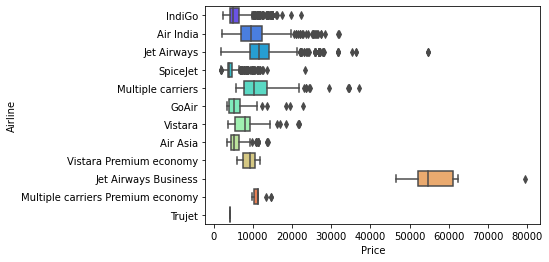

In [16]:
sns.boxplot('Price','Airline',data = train_data,palette = 'rainbow')

Airline, Source, Destination

In [17]:

Airline = pd.get_dummies(train_data.Airline,drop_first = True)
Source = pd.get_dummies(train_data.Source,drop_first=True)
Source.columns = 'Source_' + Source.columns
Destination = pd.get_dummies(train_data.Destination,drop_first= True)
Destination.columns = 'Dest_' + Destination.columns
train_data = pd.concat([train_data, Airline, Source, Destination],axis =1)




In [18]:
Airline = pd.get_dummies(test_data.Airline,drop_first = True)
Source = pd.get_dummies(test_data.Source,drop_first=True)
Source.columns = 'Source_' + Source.columns
Destination = pd.get_dummies(test_data.Destination,drop_first= True)
Destination.columns = 'Dest_' + Destination.columns
test_data = pd.concat([test_data, Airline, Source, Destination],axis =1)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Total Stops

In [19]:
dataset = [train_data,test_data]
for data in dataset:
  data.Total_Stops.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)

In [20]:
for data in dataset:
  data.drop(["Airline","Source","Destination","Route","Additional_Info",],axis =1,inplace = True)
 

In [21]:
train_data.Journey_year.value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [22]:
train_data.drop("Journey_year",axis =1,inplace = True)
test_data.drop("Journey_year",axis =1,inplace=True)

In [23]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Model Building

In [25]:
train_data.shape

(10682, 30)

In [26]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'],
      dtype='object')

In [27]:
X = train_data.loc[:,['Total_Stops','Journey_day', 'Journey_month',
       'dep_hour', 'dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi']]

In [28]:
X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
Y = train_data.iloc[:,1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
Y_predict = lin_reg.predict(X_test)

In [33]:
lin_reg.score(X_train,Y_train)

0.6240840020468166

In [34]:
lin_reg.score(X_test,Y_test)

0.61959437290701

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred = reg_rf.predict(X_test)

In [37]:
reg_rf.score(X_train,Y_train)

0.9529444926996693

In [38]:
reg_rf.score(X_test,Y_test)

0.7973243998519794

### Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators': [3,10], 'max_features':[2,3,4]},

]

grid_search = GridSearchCV(reg_rf,param_grid,cv = 3, scoring = "neg_mean_squared_error")

In [40]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [41]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [42]:
final_model = grid_search.best_estimator_

In [43]:
final_model.score(X_train,Y_train)

0.9514449759094112

## Final Accuracy

In [44]:
final_model.score(X_test,Y_test)

0.8287762719927407

In [45]:
import pickle
file = open('flightfare_regressor.pkl','wb')

pickle.dump(final_model,file)

In [46]:
model =open('flightfare_regressor.pkl','rb')
RF = pickle.load(model)

In [47]:
RF.score(X_test,Y_test)

0.8287762719927407